<a href="https://colab.research.google.com/github/viclacerda/py-desafio-ifood-pt/blob/main/py_desafio_ifood_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------
# Desafio iFood
--------


## Objetivo
Esse projeto foi feito como um dos exercícios do curso de Estatística do Básico ao Avançado da Renata Biaggi (https://www.renatabiaggi.com/eba) e tem por objetivo demonstrar o que foi aprendido sobre:
-  **Análise Exploratória**
- **Python**
- **Estatística Descritiva**



## iFood

iFood, fundada em 2011, é uma empresa brasileira atuante no ramo de entrega de refeição por meio da internet, sendo líder no setor na América Latina, com presença apenas no Brasil. Em 2018, a empresa se torna uma empresa "unicórnio" e em 2022 se torna a startup mais valiosa do Brasil e a segunda maior da América Latina, atrás apenas da mexicana Kavak.

Atualmente, o iFood detém 83% do mercado de delivery de refeições no Brasil. (fonte: https://pt.wikipedia.org/wiki/IFood em 3/12/23)



## Dicionário dos dados (inglês)

Feature | Description
--------| ------------
AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedComp2 | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedComp3 | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedComp4 | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedComp5 | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
Response (targe) | 1 if the customer accepted the offer in the last campaign, 0 otherwise
Complain | 1 if the customer complained in the last 2 years
DtCustomer | date of customer's enrollment with the company
Education | customer's level of education
Marital | customer's marital status
Kidhome | number of small children in the customer's household
Teenhome | number of teenagers in the customer's household
Income | customer's yearly household income
MntFishProducts | amount spent on fish products in the last 2 years
MntMeatProducts | amount spent on meat products in the last 2 years
MntFruits | amount spent on fruits in the last 2 years
MntSweetProducts | amount spent on sweet products in the last 2 years
MntWines | amount spent on wines in the last 2 years
MntGoldProds | amount spent on gold products in the last 2 years
NumDealsPurchases | number of purchases made with discount
NumCatalogPurchases | number of purchases made using catalogue
NumStorePurchases | number of purchases made directly in stores
NumWebPurchases | number of purchases made through company's web site
NumWebVisitsMonth | number of visits to company's web site in the last month
Recency | number of days since the last purchase


## **1. Importação de bibliotecas e extração de dados**

In [75]:
# Importando bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

!python -V
display(np.__version__)
display(pd.__version__)

# Importando biblotecas de EDA

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Python 3.10.12


'1.23.5'

'1.5.3'

In [76]:
# Importando o arquivo .csv

df = pd.read_csv('https://raw.githubusercontent.com/viclacerda/py-desafio-ifood-pt/main/mkt_data.csv')

In [77]:
# Visualização inicial do Dataframe

df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [78]:
df.tail()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782
2204,2204,52869.0,1,1,40,84,3,61,2,1,...,NaN,NaN,5.0,151,130,0,Married,PhD,2,151


## **2. Tamanho do dataframe e tipos de variáveis**

In [79]:
# Verificando volume de dados

print(f'Total de linhas: {df.shape[0]}')
print(f'Total de coluncas: {df.shape[1]}')

Total de linhas: 2205
Total de coluncas: 44


In [80]:
# Verificando os tipos de dados em cada coluna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [81]:
numerics = np.number # numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

numericas = df.select_dtypes(include=numerics)

nao_numericas = df.select_dtypes(exclude=numerics)

print(
    f"Há {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} colunas não-numéricas."
)

Há 42 colunas numéricas e 2 colunas não-numéricas.


## **3. Limpeza**

In [82]:
# Verificando se há dados ausentes

dados_ausentes = round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2).reset_index()
dados_ausentes

,index,0
0,education_Basic,0.98
1,marital_Widow,0.97
2,education_2n Cycle,0.91
3,marital_Divorced,0.90
4,education_Master,0.83
5,education_PhD,0.78
6,marital_Single,0.78
7,marital_Together,0.74
8,marital_Married,0.61
9,education_Graduation,0.50


In [83]:
# Visualizando os dados ausentes

for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("-" * 30)

# Os dados ausentes encontrados são os das colunas que descrevem os dados já presentes e resumidos nas colunas education_level e marital_status, sendo assim, para essa análise, essas colunas serão retiradas do dataframe.

Coluna: Unnamed: 0
[   0    1    2 ... 2202 2203 2204]
------------------------------
Coluna: Income
[58138. 46344. 71613. ... 56981. 69245. 52869.]
------------------------------
Coluna: Kidhome
[0 1 2]
------------------------------
Coluna: Teenhome
[0 1 2]
------------------------------
Coluna: Recency
[58 38 26 94 16 34 32 19 68 59 82 53 23 51 20 91 86 41 42 63  0 69 89  4
 96 56 31  8 55 37 76 99  3 88 72 24 92 39 29  2 54 57 30 12 18 75 90  1
 40  9 87  5 95 48 70 79 84 44 43 35 15 17 46 27 25 74 85 65 13 83 10 21
 61 73 47 36 49 28 64 78 77 81 80 45 14 52 98 93 50 60 11 66 97 62  6 33
 22 71 67  7]
------------------------------
Coluna: MntWines
[ 635   11  426  173  520  235   76   14   28    6  194  233    3 1006
   53   84 1012    4   86    1  867  384  270   36  684    8  112  110
   96  482   40  702   55  437  421   13    9  123  826  245  650   12
  510  328  984  295  447  712  452  523  546  398   10  688  247  856
  496  258  565    2  721 1032  577   64   25  163   17

In [93]:
# Removendo colunas redundantes (education e marital)

df_redundantes = df.drop(["marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow", "education_2n Cycle", "education_Basic", "education_Master", "education_PhD", "education_Graduation"], axis = 1)

# Removendo coluna que repete index (Unmnamed)

df_novoindex = df_redundantes.drop("Unnamed: 0", axis = 1)

In [96]:
df_novoindex.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_status', 'education_level', 'kids',
       'expenses'],
      dtype='object')

In [94]:
# Verificando se há dados duplicados

have_duplicate_rows = df.duplicated().any()
print(have_duplicate_rows)

# Com a ausência de dados duplicados, não há necessidade de tratamento.

False


## **4. Explorando os dados**

In [98]:
# Nessa etapa, é possível ver a mediana, a média, os percentiais, o mínimo e o máximo de cada coluna numérica.

df_novoindex.select_dtypes(include=numerics).describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,3.0,11.0,0.15102,51.095692,2512.718367,562.764626,518.707483,0.29932,0.948753,562.764626
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.0,0.0,0.35815,11.705801,202.563647,575.936911,553.847248,0.68044,0.749231,575.936911
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.00000,24.000000,2159.000000,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.0,11.0,0.00000,43.000000,2339.000000,56.000000,42.000000,0.00000,0.000000,56.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,3.0,11.0,0.00000,50.000000,2515.000000,343.000000,288.000000,0.00000,1.000000,343.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,3.0,11.0,0.00000,61.000000,2688.000000,964.000000,884.000000,0.00000,1.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,3.0,11.0,1.00000,80.000000,2858.000000,2491.000000,2458.000000,4.00000,3.000000,2491.000000


## **5. Entendendo o perfil dos clientes**

Nesse ponto, algumas perguntas precisam ser feitas para os dados para entendermos melhor o perfil dos clientes. Alguns dados já estão presentes na descrição acima, mas serão isolados abaixo.

In [99]:
# Qual é o maior salário encontrado na nossa base?

df_novoindex.Income.max()

113734.0

In [100]:
# Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem?

df_novoindex.Income.describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

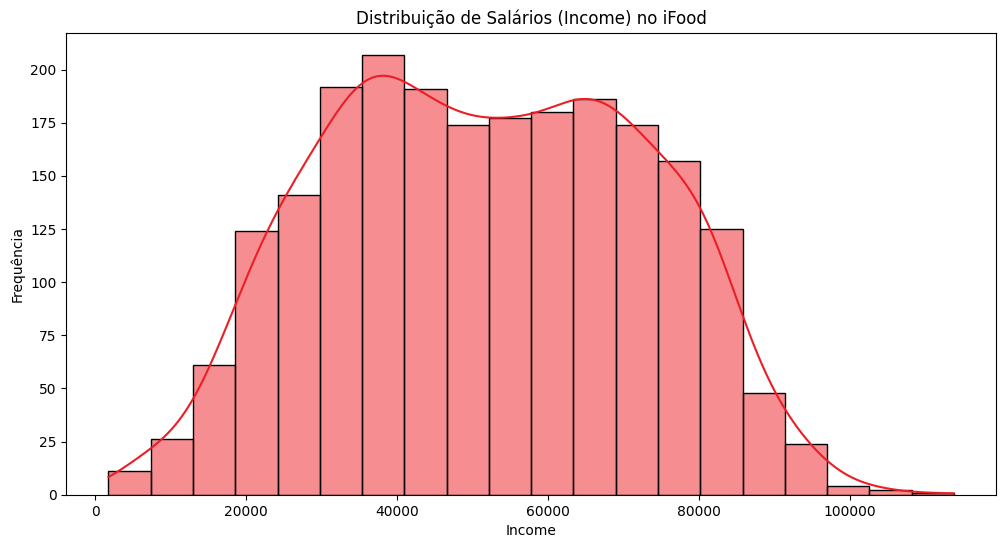

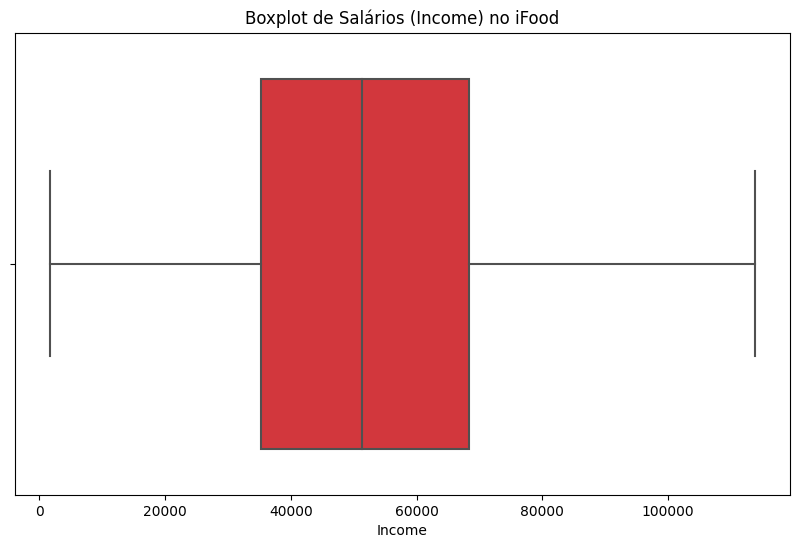

In [108]:
# Configurando o estilo Seaborn com as cores oficiais do iFood
ifood_palette = ['#EC1D25', '#F3993D', '#A31C37', '#6F6F70', '#262626']
sns.set_palette(sns.color_palette(ifood_palette))

# Visualização de histograma usando Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(df_novoindex['Income'], bins=20, kde=True)
plt.title('Distribuição de Salários (Income) no iFood')
plt.xlabel('Income')
plt.ylabel('Frequência')
plt.show()

# Boxplot usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_novoindex['Income'])
plt.title('Boxplot de Salários (Income) no iFood')
plt.xlabel('Income')
plt.show()

In [110]:
df_novoindex.Income.std()/df_novoindex.Income.mean()

0.4012441554786958

In [111]:
df.Income.skew()

0.013164263414417078

Ao observar os gráficos e do cálculo de skew (assimetria), nota-se que há uma distribuição que se aproximada da normal entre os salários dos consumidores, sendo poucos consumidores ganhando muito além da média e poucos ganhando abaixo da média e, além disso, não há outliers a serem tratados aqui.

In [112]:
# Os clientes tem níveis de educação maiores ou menores?

df_novoindex.education_level.value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: education_level, dtype: int64

In [137]:
display(df_novoindex['education_level'].value_counts() / len(df_novoindex) * 100)

Graduation    50.476190
PhD           21.587302
Master        16.507937
2n Cycle       8.979592
Basic          2.448980
Name: education_level, dtype: float64

In [139]:
# Calculando a porcentagem de cada categoria
percentagens_educacao = (df_novoindex['education_level'].value_counts() / len(df_novoindex)) * 100

# Convertendo as porcentagens para uma estrutura de dados adequada para adicionar ao gráfico
percentagens_educacao_dict = {categoria: f'{porcentagem:.2f}%' for categoria, porcentagem in percentagens_educacao.items()}


# Gráfico de barras usando o Plotly com as cores do iFood, legenda, ordem das categorias e porcentagens
fig_barras_educacao = px.bar(df_novoindex, x='education_level', color='education_level',
                              color_discrete_sequence=ifood_palette,
                              title='Distribuição de Clientes por Nível de Educação',
                              labels={'education_level': 'Nível de Educação', 'count': 'Número de Clientes'},
                              category_orders={'education_level': sorted(df_novoindex['education_level'].unique(),
                                                                         key=lambda x: df_novoindex[df_novoindex['education_level'] == x]['education_level'].count(),
                                                                         reverse=True)},
                              text=df_novoindex['education_level'].map(percentagens_educacao_dict))

# Ajustes no layout para uma apresentação mais elaborada
fig_barras_educacao.update_layout(
    showlegend=True,
    legend_title_text='',
    title_font_size=24,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
    legend=dict(title='', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    font=dict(family='Arial', size=14),
)

# Exibir o gráfico
fig_barras_educacao.show()

Os clientes da base, em geral, tem ensino superior ou pós-graduação, num total de 87,58% do total de clientes. A minoria apenas completou o ensino básico e o fundamental.

In [120]:
# Quantos clientes em cada estado civil?

df_novoindex.marital_status.value_counts()

Married     854
Together    568
Single      477
Divorced    230
Widow        76
Name: marital_status, dtype: int64

In [124]:
display(df_novoindex['marital_status'].value_counts() / len(df_novoindex) * 100)

Married     38.730159
Together    25.759637
Single      21.632653
Divorced    10.430839
Widow        3.446712
Name: marital_status, dtype: float64

In [140]:
# Calculando a porcentagem de cada categoria
porcentagens = (df_novoindex['marital_status'].value_counts() / len(df_novoindex)) * 100

# Convertendo as porcentagens para uma estrutura de dados adequada para a adição ao gráfico
porcentagens_dict = {categoria: f'{porcentagem:.2f}%' for categoria, porcentagem in porcentagens.items()}


# Gráfico de barras usando Plotly com as cores do iFood, legenda, ordenação das categorias e porcentagens
fig_barras_estado_civil = px.bar(df_novoindex, x='marital_status', color='marital_status',
                                 color_discrete_sequence=ifood_palette,
                                 title='Distribuição de Clientes por Estado Civil',
                                 labels={'marital_status': 'Estado Civil', 'count': 'Número de Clientes'},
                                 category_orders={'marital_status': sorted(df_novoindex['marital_status'].unique(),
                                                                           key=lambda x: df_novoindex[df_novoindex['marital_status'] == x]['marital_status'].count(),
                                                                           reverse=True)},
                                 text=df_novoindex['marital_status'].map(porcentagens_dict))

# Ajustes no layout para uma apresentação mais elaborada
fig_barras_estado_civil.update_layout(
    showlegend=True,
    legend_title_text='',
    title_font_size=24,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
    legend=dict(title='', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    font=dict(family='Arial', size=14),
)

# Exibir o gráfico
fig_barras_estado_civil.show()

A maioria dos clientes da base tem parceiros(as), num total de 66.49% (soma dos casados e "juntos"). A minoria dos clientes, num total de 3.45% são viúvos.

## **6. Correlação entre dados**

Nessa etapa, alguma perguntas levanta hipóteses de correlação que poderão ser respondidas com a análise de correlação entre variáveis. O objetivo é responder às seguintes perguntas:

- Qual é a relação de estado civil com o número de fihos? As pessoas casadas têm um maior número de filhos?
- As pessoas gastam mais ou menos na plataforma quanto têm filhos?
- Pessoas que têm um maior salário gastam mais?

<Axes: xlabel='marital_status', ylabel='kids'>

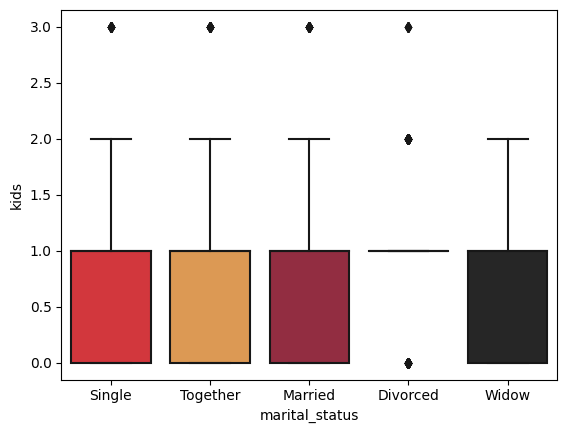

In [147]:
# Qual é a relação de estado civil com o número de fihos? As pessoas casadas têm um maior número de filhos?

sns.boxplot(x='marital_status', y='kids', data=df_novoindex)


In [148]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


In [150]:
df.groupby("marital_status")["kids"].median()

marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64

Observando o gráfico e a descrição estatística, os números parecem muito próximos, sendo assim, será necessário um teste de hipótese para comprovação de correlação.

*O teste de hipótese será feito na ampliação desse projeto num futuro próximo.*

<Axes: xlabel='kids', ylabel='expenses'>

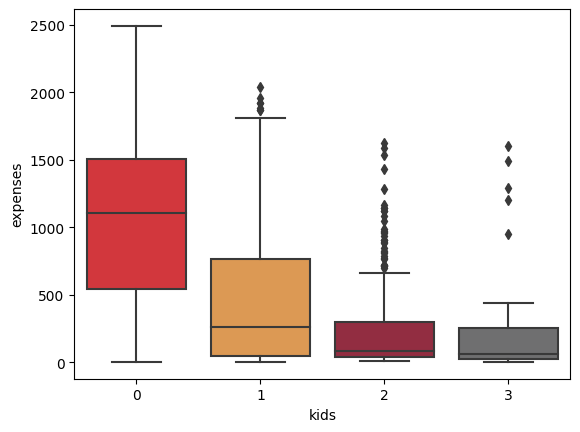

In [152]:
# As pessoas gastam mais ou menos na plataforma quanto têm filhos?

sns.boxplot(x='kids', y='expenses', data=df_novoindex)

In [153]:
df.groupby(["kids"])["expenses"].describe()

,count,mean,std,min,25%,50%,75%,max
kids,,,,,,,,
0,628.0,1041.207006,625.734894,5.0,546.00,1106.5,1505.50,2491.0
1,1112.0,434.530576,452.606603,4.0,50.00,264.0,762.25,2036.0
2,415.0,221.568675,290.259678,8.0,39.00,84.0,296.50,1627.0
3,50.0,237.380000,390.174157,6.0,28.25,62.0,254.00,1601.0


In [154]:
df.groupby(["kids"])["expenses"].median()

kids
0    1106.5
1     264.0
2      84.0
3      62.0
Name: expenses, dtype: float64

Considerando os gráficos e as medições, é possível dizer que pessoas sem filhos gastam mais com o serviço do que pessoas com algum filho. É possível também perceber que a média e a mediana de pessoas com dois ou três filhos sofrem alterações devido aos outliers dos correspondentes grupos, porém a tendência de ter nenhum ou um filho de gastar mais, comparada à tendência de ter dois ou três filhos e gastar menos indica que pessoas com menos nenhum ou menos filhos gastam mais na plataforma.

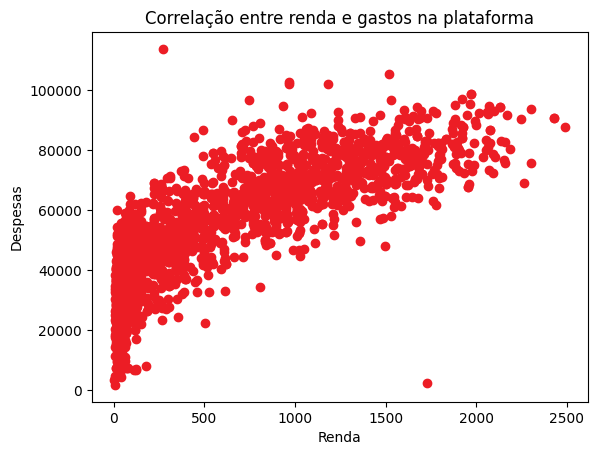

In [157]:
# Pessoas que têm um maior salário gastam mais?

plt.scatter(df_novoindex['expenses'], df_novoindex['Income'])
plt.title('Correlação entre renda e gastos na plataforma')
plt.xlabel('Despesas')
plt.ylabel('Renda')
plt.show()

O gráfico demonstra uma linearidade na correlação entre despesas e renda, sendo assim, aparentemente o aumento da renda tende a estar correlacionado ao aumento das despesas com a platafoma.

## **7. Considerações finais**